In [1]:
import numpy as np
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

#chttps://scikit-image.org/docs/dev/api/skimage.data.html

Low Pass Filters

Text(0.5, 1.0, 'Original image')

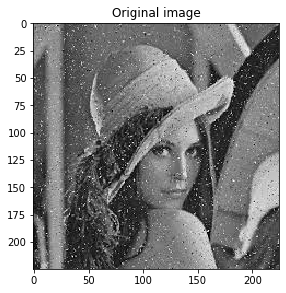

In [3]:
from skimage import data
img=io.imread('lena_sp_noise.jpeg')
#img = data.coins()# Reading the image camers from the std dataset of skimage
io.imshow(img)
plt.title('Original image')

Homogenous Filters

Text(0.5, 1.0, 'Homogeneous filter using filter2D function')

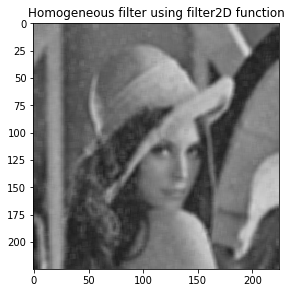

In [4]:
kernel=np.ones([5,5])/25 # Homogeneous is an everaging filter. hence is smoothens and blurs the 

dst=cv2.filter2D(img,-1,kernel) #2d convolution
io.imshow(dst)
plt.title('Homogeneous filter using filter2D function')

Text(0.5, 1.0, 'Homogeneous filter using blur method')

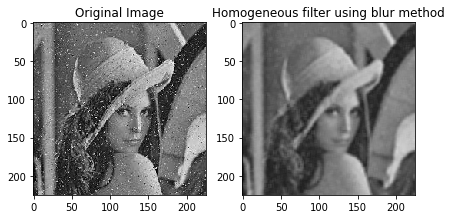

In [5]:
plt.subplot(1,2,1),io.imshow(img), plt.title('Original Image')
plt.subplot(1,2,2),io.imshow(dst),plt.title('Output of Homogeneous filter')

blur=cv2.blur(img,(5,5))
io.imshow(blur)
plt.title('Homogeneous filter using blur method')

Gaussian Blur Filter

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0e2c0dbcd0>,
 Text(0.5, 1.0, 'Gaussian blur'))

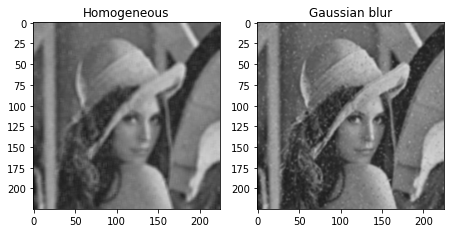

In [6]:
gblur=cv2.GaussianBlur(img,(5,5),1)
io.imshow(gblur)
plt.title('Gaussian blur filter')

plt.subplot(1,2,1),plt.imshow(dst,'gray'), plt.title('Homogeneous')
plt.subplot(1,2,2),plt.imshow(gblur,'gray'),plt.title('Gaussian blur')

Bilateral Filter

Text(0.5, 1.0, 'Bilateral filter')

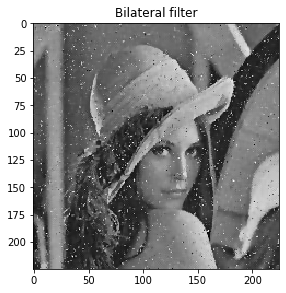

In [7]:
bblur=cv2.bilateralFilter(img,5,75,75)
io.imshow(bblur)
plt.title('Bilateral filter')

Median Blur Filter

Text(0.5, 1.0, 'Median blur filter')

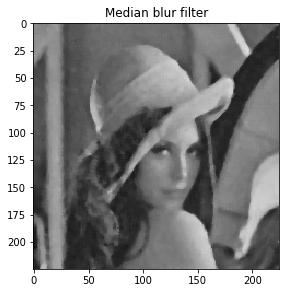

In [8]:
mblur=cv2.medianBlur(img,5)
io.imshow(mblur)
plt.title('Median blur filter')

High Pass Filter

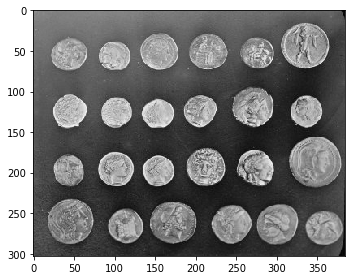

In [9]:
from skimage import data
img=data.coins()
io.imshow(img)

Laplacian Filter

Text(0.5, 1.0, 'laplacian filter')

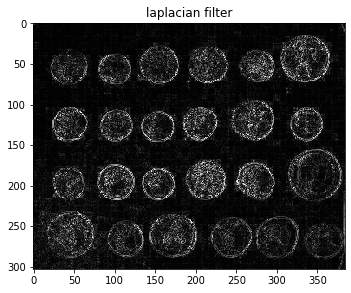

In [10]:
lap=cv2.Laplacian(img, cv2.CV_64F)
# cv_64f is data type 64 bit float which can deal with negatives
#To convert it back to unsigned int
lap=np.uint8(np.absolute(lap))
io.imshow(lap)
plt.title('laplacian filter')

Sobel Operator

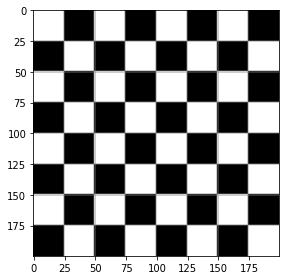

In [11]:
img1=data.checkerboard()
io.imshow(img1)

Text(0.5, 1.0, 'Sobel y filter')

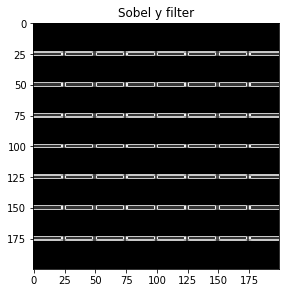

In [12]:
img1=data.checkerboard()
sobelx=cv2.Sobel(img1, cv2.CV_64F,1,0)# 1 0 for derivative in x direction
# cv_64f is data type 64 bit float which can deal with negatives
sobely=cv2.Sobel(img1, cv2.CV_64F,0,1)# 0 1 for derivative in y direction
#To convert it back to unsigned int
sobelx=np.uint8(np.absolute(sobelx))
sobely=np.uint8(np.absolute(sobely))

io.imshow(sobely)
plt.title('Sobel y filter')

Text(0.5, 1.0, 'Sobel x filter')

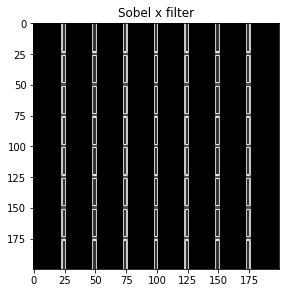

In [13]:
io.imshow(sobelx)
plt.title('Sobel x filter')

Text(0.5, 1.0, 'Sobel x and y filter combined')

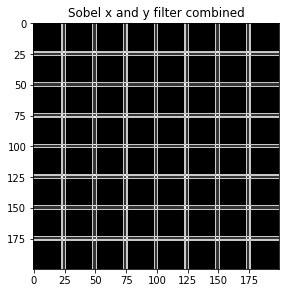

In [15]:
sobelcombined_cheaker=cv2.bitwise_or(sobelx,sobely)
io.imshow(sobelcombined_cheaker)
plt.title('Sobel x and y filter combined')

In [16]:
sobelx=cv2.Sobel(img, cv2.CV_64F,1,0)# 1 0 for derivative in x direction
# cv_64f is data type 64 bit float which can deal with negatives
sobely=cv2.Sobel(img, cv2.CV_64F,0,1)# 0 1 for derivative in y direction
#To convert it back to unsigned int
sobelx=np.uint8(np.absolute(sobelx))
sobely=np.uint8(np.absolute(sobely))

Text(0.5, 1.0, 'Sobel y filter')

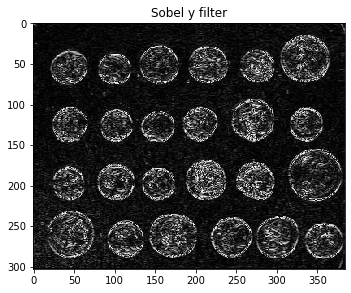

In [17]:
io.imshow(sobely)
plt.title('Sobel y filter')

Text(0.5, 1.0, 'Sobel x filter')

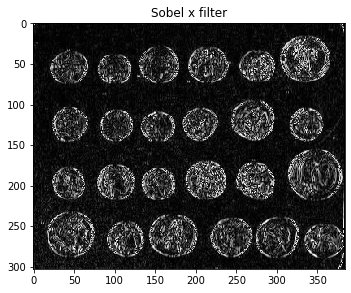

In [18]:
io.imshow(sobelx)
plt.title('Sobel x filter')

Text(0.5, 1.0, 'Sobel x and y filter combined')

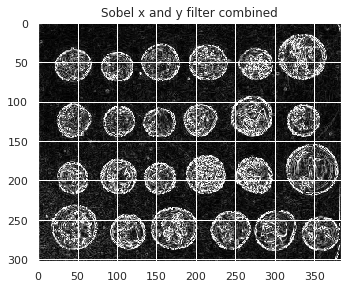

In [21]:
sobelcombined_coins=cv2.bitwise_or(sobelx,sobely)
io.imshow(sobelcombined_coins)
plt.title('Sobel x and y filter combined')

In [20]:
import seaborn as sns
sns.set()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0e2441f6d0>,
 Text(0.5, 1.0, 'sobelcombined_coins'))

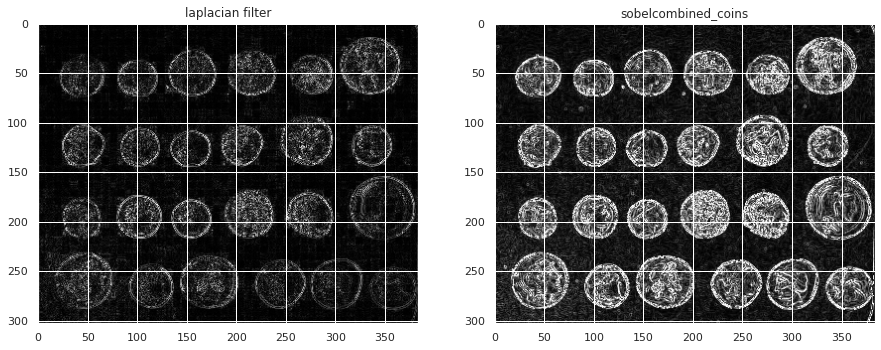

In [22]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1),plt.imshow(lap ,'gray' ), plt.title('laplacian filter')
plt.subplot(1,2,2),plt.imshow(sobelcombined_coins,'gray'),plt.title('sobelcombined_coins')

In [23]:
from skimage import data
from skimage import exposure
img=io.imread('https://cdn.zeebiz.com/sites/default/files/styles/zeebiz_850x478/public/2018/11/14/59887-mutual-fund-reuters.jpg?itok=LT3xg6SO')
#img = data.moon()

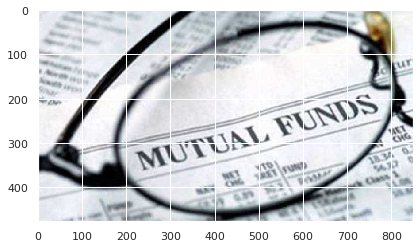

In [24]:
io.imshow(img)

Image Enhancement Techniques

Gamma Correction

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0e23ec4610>,
 Text(0.5, 1.0, 'Gamma correction'))

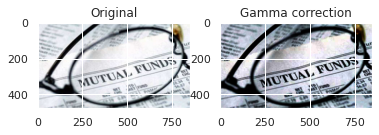

In [25]:
gamma_c= exposure.adjust_gamma(img,3)

plt.subplot(1,2,1),plt.imshow(img,'gray'), plt.title('Original')
plt.subplot(1,2,2),plt.imshow(gamma_c,'gray'),plt.title('Gamma correction')

Log Correction

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0e24c5dad0>,
 Text(0.5, 1.0, 'Log correction'))

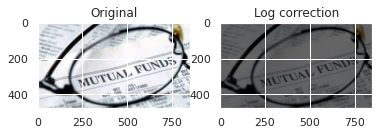

In [26]:
logarithmic_corrected = exposure.adjust_log(img, 0.4)

plt.subplot(1,2,1),plt.imshow(img,'gray'), plt.title('Original')
plt.subplot(1,2,2),plt.imshow(logarithmic_corrected,'gray'),plt.title('Log correction')

Histogram Equalization

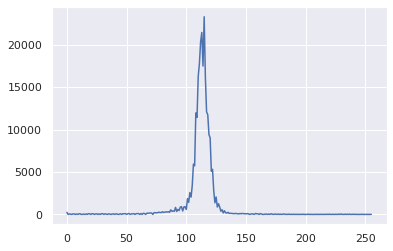

In [27]:
img = data.moon()
img1 = data.moon()
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist_full)

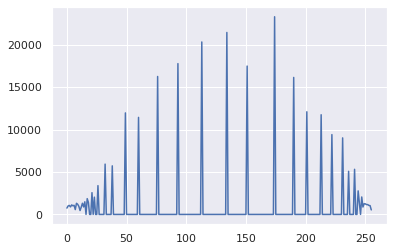

In [28]:
cv2.equalizeHist(img,img)
hist_full1 = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist_full1)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0e23c9e2d0>,
 Text(0.5, 1.0, 'Equalised Histogram'))

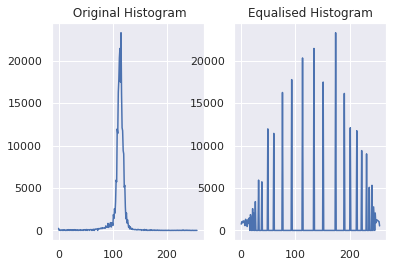

In [29]:
plt.subplot(1,2,1),plt.plot(hist_full), plt.title(' Original Histogram')
plt.subplot(1,2,2),plt.plot(hist_full1),plt.title('Equalised Histogram')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0e23be5890>,
 Text(0.5, 1.0, 'Hist Equalised Image'))

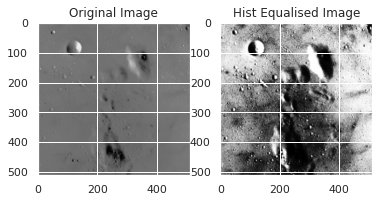

In [30]:
plt.subplot(1,2,1),plt.imshow(img1,'gray'), plt.title('Original Image')
plt.subplot(1,2,2),plt.imshow(img,'gray'),plt.title('Hist Equalised Image')